In [ ]:
# 1. 인공지능과 가위바위보 하기

In [ ]:
# 1-1. 인공지능과 가위바위보 하기

In [ ]:
# 딥러닝 기술은 "데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"의

# 순서대로 만들게 됩니다. 

In [ ]:
# 1-2. 데이터를 준비하자!

In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

2.4.1


In [33]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

60000


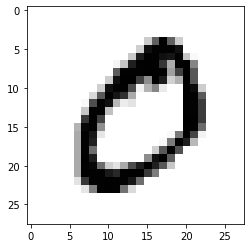

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary) # x_train[1]에 담긴 이미지는 x_train 행렬의 2번째 이미지입니다.
plt.show()

In [3]:
print(y_train[1])

0


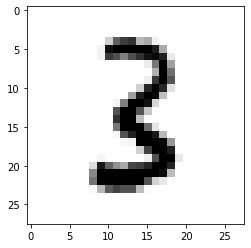

50001 번째 이미지의 숫자는 바로  3 입니다.


In [34]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=50000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
# Matplotlib 이란?

# 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart),

# 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# 위의 mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와

# 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있는데요.

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
# 데이터 전처리 하기

In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [ ]:
# 1-3. 딥러닝 네트워크 설계하기

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [ ]:
# Conv2D

Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다.

여기서는 16과 32를 사용했습니다.

가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다.

우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다.

만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다.

그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.

In [ ]:
# Dense

# Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다.

# 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다.

# 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개,

# 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다.

# 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.

# 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는

# 클래스 수로 지정하면 됩니다.

# 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

In [ ]:
# 위에서 만든 딥러닝 네트워크 모델을 확인해 보려면, model.summary() 메소드를 이용

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
# 1-4. 딥러닝 네트워크 학습시키기

# 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가집니다.

# 이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정하였으므로,

# print(x_train.shape) 을 해보면,(60000, 28, 28) 로 채널수에 대한 정보가 없습니다. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 합니다

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
# 위의 내용을 기반으로 x_train 학습 데이터로 딥러닝 네트워크를 학습

# epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻

# model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용해야함.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4313 - accuracy: 0.8688
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0471 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0164 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [ ]:
# 각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다.

# 인식 정확도가 0.8688에서 0.9961까지

In [ ]:
# 1-5. 얼마나 잘 만들었는지 확인하기

# 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것입니다.

# 즉, 연습문제를 잘푸는 인공지능을 만든 거죠.

# 우리가 만든 딥러닝 네트워크는 실제 시험도의 결과를 알기 위해서,

# 시험용 데이터(x_test)를 가지고 확인해 봅시다.

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0377 - accuracy: 0.9893
test_loss: 0.03768241032958031 
test_accuracy: 0.989300012588501


In [ ]:
# 위에서 학습한 대로 결과값이 99.61 점이 나올 거라 예상을 하였으나,

# 결과적으로 98.93 점이 나옴을 확인 할 수 있었습니다.

# 즉, 연습문제보다, 실제 시험 문제가 어렵다라는 것을 알 수 있으며,

# 어찌보면, 인식률이 떨어지는 것은 당연하다고 볼 수 있습니다.

In [ ]:
# 1-6. 더 좋은 네트워크 만들어 보기

# 3번째 스텝에서 진행한, 딥러닝 네트워크 설계하기에서 살펴본

# 하이퍼파라미터들을 바꾸어 보는 것인데요.

# Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나,

# Dense 레이어에서 뉴런수를 바꾸어 보거나,

# 학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 겁니다.

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

In [ ]:
# 1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

In [ ]:
# 초기 setup 하기

In [148]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [149]:
# 데이터 불러오기 + Resize 하기

In [150]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [151]:
import random

In [152]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

111  images to be resized.
111  images resized.
가위 이미지 resize 완료!


In [153]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [154]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

102  images to be resized.
102  images resized.
보 이미지 resize 완료!


In [155]:
import numpy as np

def load_data(img_path, number_of_data=314):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 314 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_train shape: (314, 28, 28, 3)
y_train shape: (314,)


라벨:  0


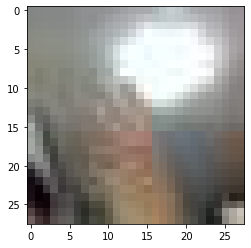

In [156]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [164]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

In [165]:
# 딥러닝 네트워크 설계하기

In [166]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("rock_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("scissor_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("paepr_test 이미지 resize 완료!")

101  images to be resized.
101  images resized.
rock_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
scissor_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
paepr_test 이미지 resize 완료!


In [167]:
def load_data(img_path, number_of_data=301):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 301 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_test shape: (301, 28, 28, 3)
y_test shape: (301,)


In [168]:
n_channel_1=16
n_channel_2=32
n_dense=64
n_test_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model.fit(x_test_norm, y_test, epochs = 20)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [169]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 24.8081 - accuracy: 0.8704
test_loss: 24.808086395263672 
test_accuracy: 0.8704319000244141


model.predict() 결과 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


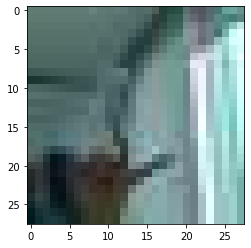

In [170]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘 못 분류한 테스트 데이터 수 : 39
예측확률분포: [5.3962737e-12 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
라벨: 0, 예측결과: 2


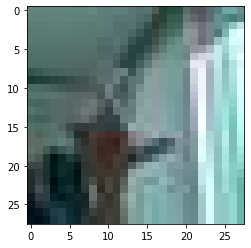

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


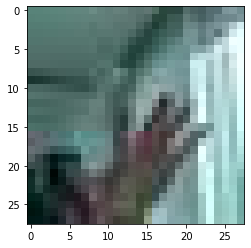

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


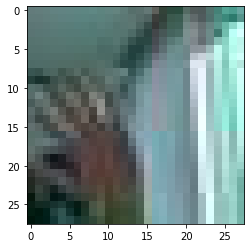

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


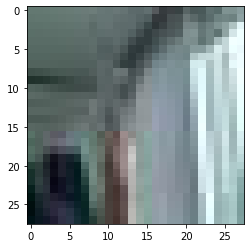

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


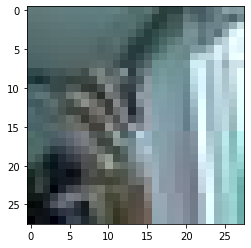

In [171]:
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

print("잘 못 분류한 테스트 데이터 수 :", len(wrong_predict_list))
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()